Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [334]:
#importing libraries

import numpy as np
import pandas as pd

In [335]:
df=pd.read_csv('winequality-red.csv')    # importing csv file into dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [336]:
# setting a arbitrary cutoff for wine quality i.e, value >=7 is good(1) and value <7 is not good(0)
df['quality'].replace(to_replace=[3,4,5,6],value=0,inplace=True)
df['quality'].replace(to_replace=[7,8],value=1,inplace=True)

In [337]:
df['quality'].unique()# checking for unique values in column

array([0, 1], dtype=int64)

In [338]:
df.shape # checking shape of the dataset

(1599, 12)

In [339]:
df.isnull().sum() # checking for null values in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

there are no null values in dataset

In [340]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [341]:
df.describe() #describing the data to get mean, standard deviations and quantile ranges

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [342]:
df.info() # to check for data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [344]:
#Checking if there are any duplicates
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

In [345]:
#importing libraries to plot data

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing warnings

import warnings
warnings.filterwarnings('ignore')

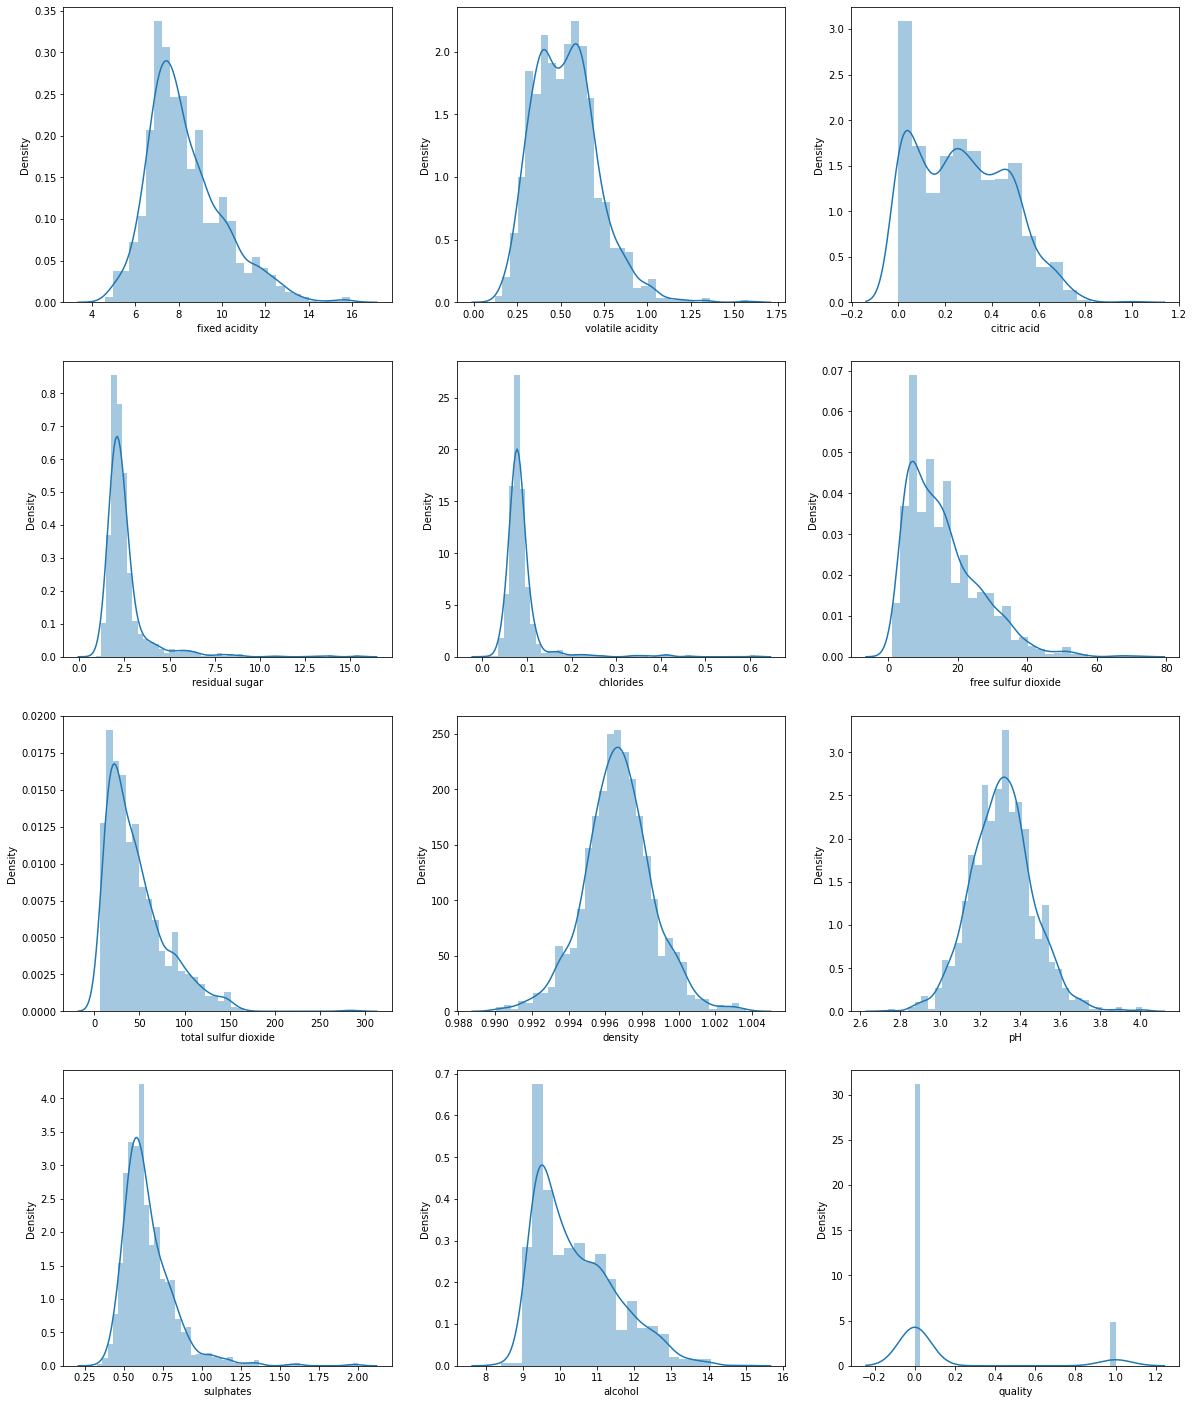

In [346]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<= 12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()
    


 distplot shows skewness in all columns except density and ph.
Also there are presence of outliers as shown in distplot


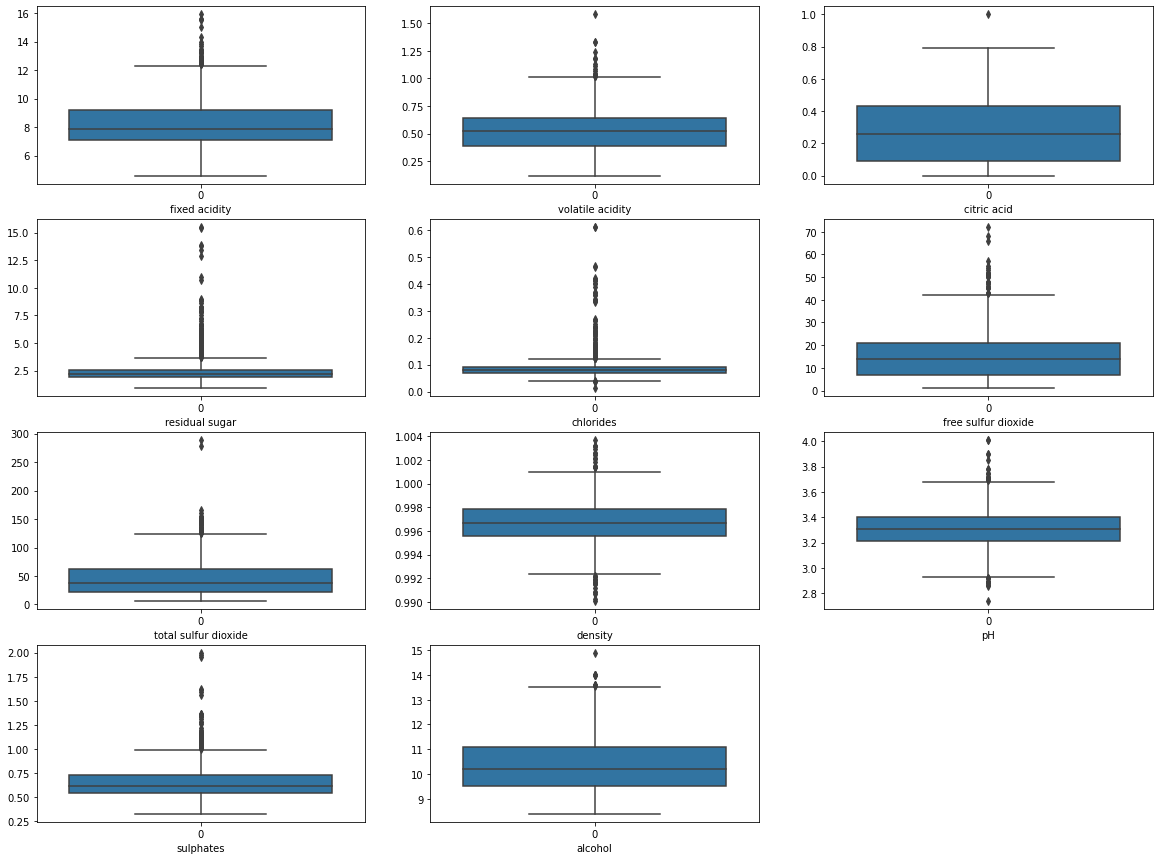

In [347]:
#plotting boxplot to check for outliers
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data=df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()    

all the column data has outliers in it. citric acid column has less outliers compared to other columns.

In [348]:
#removing outliers using zscore method
from scipy.stats import zscore # importing libraries

z=np.abs(zscore(df))

In [349]:
#using threshold=3, any data above (value of 3 will be considered outliers.
filtering_entry=(z<3).all(axis=1)

In [350]:
df=df[filtering_entry]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [351]:
df.shape # new shape of data after removing outliers

(1239, 12)

In [20]:
# data loss percentage
data_loss=((1359-1239)/1359)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 8.830022075055188%


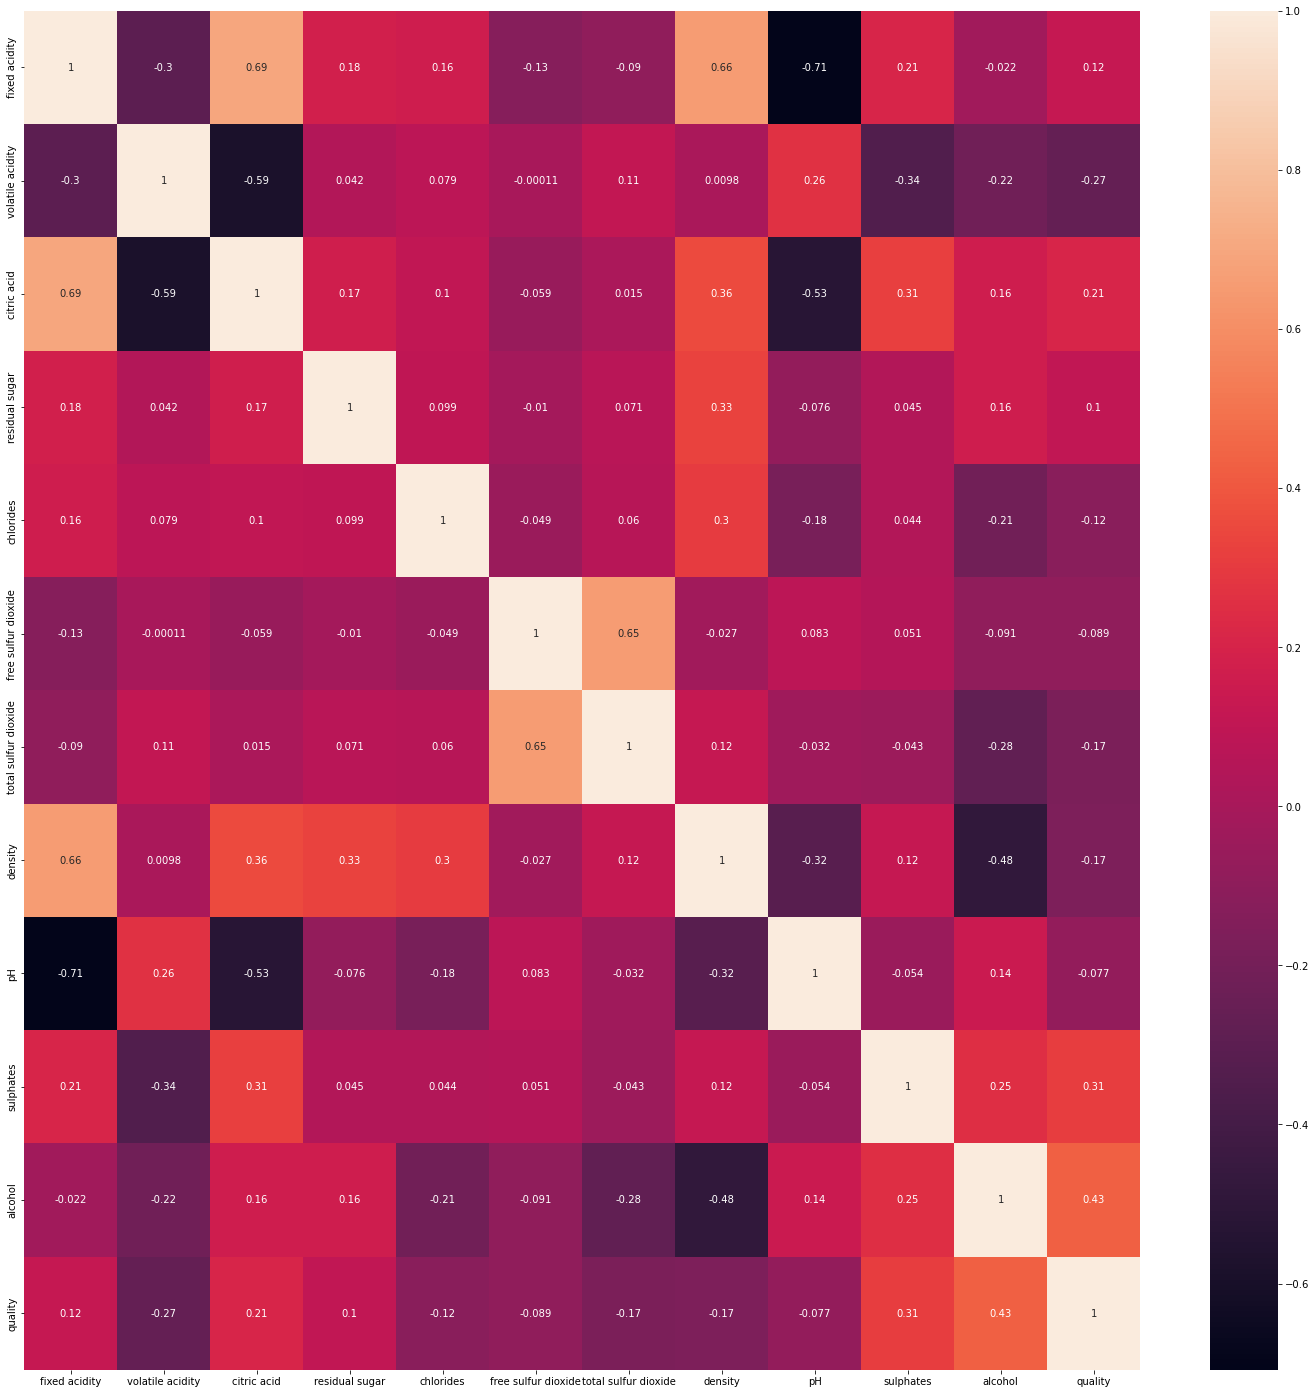

In [352]:
#plotting heatmap to check for correlation

data_corr= df.corr()

plt.figure(figsize=(25,25))
sns.heatmap(data_corr,annot=True)
plt.show()

 according  to me, looks there is no major correlation.

In [353]:
#using feature selection technique using SelectPercentile method
from sklearn.feature_selection import SelectPercentile,chi2 # importing libraries

#instantiating SelectPercentile and fit(features,label)
#subsetting data into x and y
x=df.drop(['quality'],axis=1) # features
y=df.quality #label

In [354]:
Spercentile=SelectPercentile(score_func=chi2,percentile=80)
Spercentile=Spercentile.fit(x,y)

In [355]:
cols=Spercentile.get_support(indices=True)
print('feature index= ',cols) #this will provide index nos. of features that are selected

feature index=  [ 0  1  2  3  5  6  9 10]


In [356]:
features=x.columns[cols] 
print('new_x= ',list(features))  # as per features selction method these are columns that can be used for training model.

new_x=  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


In [357]:
df_scores=pd.DataFrame({'features':x.columns,'chi2score':Spercentile.scores_,'pValue':Spercentile.pvalues_})

In [358]:
df_scores.sort_values(by='chi2score',ascending=False)

,features,chi2score,pValue
6,total sulfur dioxide,746.727239,2.065473e-164
5,free sulfur dioxide,56.407712,5.889891e-14
10,alcohol,23.588306,1.193104e-06
2,citric acid,7.653539,5.666107e-03
0,fixed acidity,5.992946,1.436320e-02
1,volatile acidity,4.975322,2.571141e-02
3,residual sugar,3.733283,5.333847e-02
9,sulphates,3.129209,7.690107e-02
4,chlorides,0.106810,7.438055e-01
8,pH,0.043826,8.341781e-01


In [359]:
#By using chi2score method it is proved that density and pH do not have correlation with label and hence dropping them.

#Following are the best features that are being added to new variable called new_x
new_x=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
          'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']]
new_x   

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,0.00,1.9,11.0,34.0,0.56,9.4
1,7.8,0.880,0.00,2.6,25.0,67.0,0.68,9.8
2,7.8,0.760,0.04,2.3,15.0,54.0,0.65,9.8
3,11.2,0.280,0.56,1.9,17.0,60.0,0.58,9.8
5,7.4,0.660,0.00,1.8,13.0,40.0,0.56,9.4
...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,28.0,38.0,0.82,9.5
1594,6.2,0.600,0.08,2.0,32.0,44.0,0.58,10.5
1595,5.9,0.550,0.10,2.2,39.0,51.0,0.76,11.2
1597,5.9,0.645,0.12,2.0,32.0,44.0,0.71,10.2


In [360]:
df['quality'].value_counts() # checking for value counts in label

0    1070
1     169
Name: quality, dtype: int64

In [361]:
# using standard scalar to standardize the data
#importing libraries

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_scaled=scaler.fit_transform(new_x)

In [362]:
# train-test split
#impoprting library 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=50)

In [363]:
#Since the label data is imbalanced hence using oversampling technique i.e SMOTE

#importing library for SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

sm=SMOTE(0.75)

In [364]:
xtrain_ns,ytrain_ns=sm.fit_resample(x_train,y_train)
print('The no. of classes before fit',format(Counter(y_train)))
print('The no. of classes after fit',format(Counter(ytrain_ns)))

The no. of classes before fit Counter({0: 802, 1: 127})
The no. of classes after fit Counter({0: 802, 1: 601})


In [365]:
# importing libraries for model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report 

In [366]:
#model initiation 
dt=DecisionTreeClassifier()

In [367]:
# finding best random state for Decision Tree model
for i in range(0,100):
    xtrain_ns,x_test,ytrain_ns,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    dt.fit(xtrain_ns,ytrain_ns)
    y_pred=dt.predict(xtrain_ns)
    pred=dt.predict(x_test)
    print('training accuracy is ',(accuracy_score(ytrain_ns,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)      

training accuracy is  100.0  for random state  0
testing accuracy is  83.87096774193549  for random state  0
training accuracy is  100.0  for random state  1
testing accuracy is  84.51612903225806  for random state  1
training accuracy is  100.0  for random state  2
testing accuracy is  85.80645161290322  for random state  2
training accuracy is  100.0  for random state  3
testing accuracy is  83.54838709677419  for random state  3
training accuracy is  100.0  for random state  4
testing accuracy is  80.96774193548387  for random state  4
training accuracy is  100.0  for random state  5
testing accuracy is  80.3225806451613  for random state  5
training accuracy is  100.0  for random state  6
testing accuracy is  82.9032258064516  for random state  6
training accuracy is  100.0  for random state  7
testing accuracy is  82.25806451612904  for random state  7
training accuracy is  100.0  for random state  8
testing accuracy is  82.58064516129032  for random state  8
training accuracy is 

as per above function output best random state is 32 which provides training and testing accuracy of 100% and 88.38% respectively.

In [368]:
#inputing 32 as random state in following function

#defining function to train,test data and print accuracy_score for train and test data alongwith classification report and confusion matrix
xtrain_ns,x_test,ytrain_ns,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=32)

def metric_score(dt,xtrain_ns,x_test,ytrain_ns,y_test,train=True):
    if train:
        y_pred=dt.predict(xtrain_ns)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(ytrain_ns,y_pred)*100:.2f}%')
    elif train==False:
        pred=dt.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))

In [369]:
dt=DecisionTreeClassifier()
dt.fit(xtrain_ns,ytrain_ns)

DecisionTreeClassifier()

In [370]:
#passing the function
metric_score(dt,xtrain_ns,x_test,ytrain_ns,y_test,train=True) # this is for training score

metric_score(dt,xtrain_ns,x_test,ytrain_ns,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:88.39%
classification report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       271
           1       0.53      0.62      0.57        39

    accuracy                           0.88       310
   macro avg       0.74      0.77      0.75       310
weighted avg       0.89      0.88      0.89       310

confusion matrix  [[250  21]
 [ 15  24]]


In [371]:
# using cross validation score to check if model is overfitted

from sklearn.model_selection import cross_val_score

cross_val_score(dt,x_scaled,y,cv=5).mean()

0.8256562622436986

In [372]:
# Doing hyperparameter tuning using GridSearchCV method

from sklearn.model_selection import GridSearchCV #importing library

grid_param={'criterion':['gini','entropy'], #setting parameters
           'max_depth':[6,7,8,9,10],
           'min_samples_leaf':[4,5,6,7,8],
           'min_samples_split':[3,4,5,6,7],
           'max_leaf_nodes':[5,6,7,8,9]}

In [373]:
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5)

grid_search.fit(xtrain_ns,ytrain_ns) 


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10],
                         'max_leaf_nodes': [5, 6, 7, 8, 9],
                         'min_samples_leaf': [4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7]})

In [374]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_leaf': 6, 'min_samples_split': 3}


In [395]:
# initiate decision tree classifier with new parameters and train

dt=DecisionTreeClassifier(criterion='gini', max_depth=10,
                           max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5)
#training the model
dt.fit(xtrain_ns,ytrain_ns)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=6,
                       min_samples_split=5)

In [396]:
#passing the function
metric_score(dt,xtrain_ns,x_test,ytrain_ns,y_test,train=True) # this is for training score

metric_score(dt,xtrain_ns,x_test,ytrain_ns,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:89.67%
-----Testing score-----
Accuracy score:88.71%
classification report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       271
           1       0.54      0.64      0.59        39

    accuracy                           0.89       310
   macro avg       0.75      0.78      0.76       310
weighted avg       0.90      0.89      0.89       310

confusion matrix  [[250  21]
 [ 14  25]]


In [287]:
pred=dt.predict(x_test)

In [288]:
# Plotting ROC curve
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.02830189 1.        ]
tpr [0.         0.44680851 1.        ]
threshold [2 1 0]


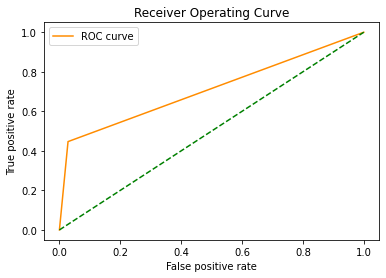

In [289]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()